Imports / Drive Mounting

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from IPython.display import display
from sklearn.cluster import KMeans
from skimage.io import imread
from google.colab import drive
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, mean_squared_error

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# QUESTION 1 (15 pts.)
Image segmentation is a process to highlight useful regions in images. Use the
skimage.io module to load the following image. Afterwards, segment the image into
multiple useful regions using the k-means clustering method. The segmented image
should highlight, for example, the dashboard, the driver’s arms, cars ahead etc., by
grouping similar pixels together. You do not need to split the data into train and test set
for this problem.


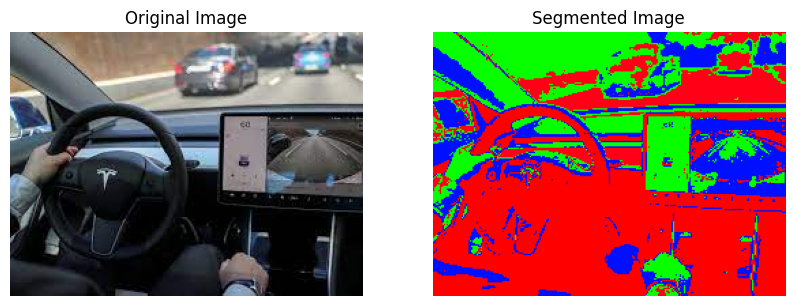

In [55]:
file_path = '/content/drive/MyDrive/ML/seg2.jpg'
img = imread(file_path)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(img.reshape(-1, 3))

segmented_image = kmeans.labels_.reshape(img.shape[:2])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(segmented_image, cmap='hsv')  # jet also looks good
axes[1].set_title('Segmented Image')
axes[1].axis('off')
plt.show()

# QUESTION 2 (40 pts.)

Implement your own linear machine learning model optimized with minibatch gradient descent method to predict the price of a house in a city with population
of 160, 000. Train the model to fit the housing prices dataset found on LMS. Vary the
batch size from 1,5,10, and 20. Plot the objective function, J for each batch size. You do
not need to split the data into train and test set for this problem. What happens when
you use batch size equal to one?

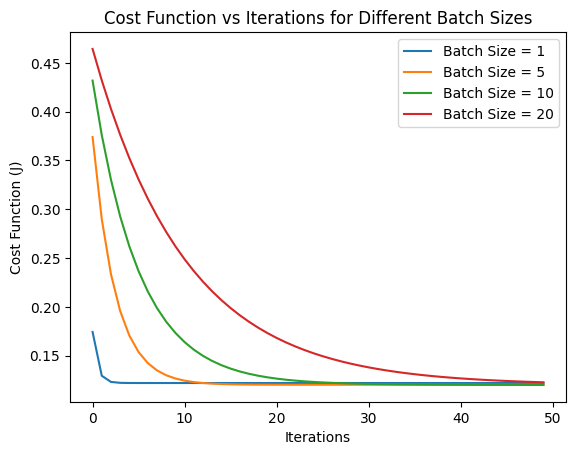

Predicted price for a city with population 160,000: $177360.40


In [56]:
def cost_function(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def MBGradDescent(X, y, cost_function, alpha=0.01, iterations=1000, batch_size=10):
    """
    Performs minibatch gradient descent to learn the parameters of a linear regression model.

    Args:
        X: The feature matrix.
        y: The target variable vector.
        cost_function: The cost function to minimize.
        alpha: The learning rate.
        iterations: The number of iterations to run gradient descent.
        batch_size: The size of each minibatch.

    Returns:
        A tuple containing the learned parameters (theta) and a list of the cost function values
        over the iterations.
    """
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for i in range(iterations):
        for j in range(0, m, batch_size):
            X_batch = X[j:min(j + batch_size, m)]
            y_batch = y[j:min(j + batch_size, m)]

            predictions = X_batch @ theta
            error = predictions - y_batch
            gradient = (1/len(y_batch)) * (X_batch.T @ error)
            theta = theta - alpha * gradient
        costs.append(cost_function(X, y, theta))
    return theta, costs

data = np.loadtxt('/content/drive/MyDrive/ML/housing_prices.csv', delimiter=',', skiprows=1)
X = data[:, 0].reshape(-1, 1) #population
y = data[:, 1]  #cost

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

iterations=50
batch_sizes = [1, 5, 10, 20]
costs_history = {}

for batch_size in batch_sizes:
    theta, costs = MBGradDescent(X, y, cost_function, alpha=0.01, iterations=iterations, batch_size=batch_size)
    costs_history[batch_size] = costs

for batch_size, costs in costs_history.items():
    plt.plot(range(iterations), costs, label=f'Batch Size = {batch_size}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function (J)')
plt.title('Cost Function vs Iterations for Different Batch Sizes')
plt.legend()
plt.show()

population = 160000
population_norm = (population - np.mean(data[:,0])) / np.std(data[:, 0])
predicted_price_norm = theta[0] + theta[1]*population_norm

predicted_price = (predicted_price_norm * np.std(data[:, 1])) + np.mean(data[:, 1])

print(f"Predicted price for a city with population 160,000: ${predicted_price:.2f}")


When a batch size of 1 is used, the cost function minimizes very quickly as the number of iterations increases. This is in contrast to the higher number of batch sizes where it takes ~50 iterations for a batch size of 20 to be minimized to the same level as the 1 batch size.

# QUESTION 3 (20 pts.)
Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression
model to classify breast cancers. You must recursively eliminate features to find the best
two features to perform the classification. Evaluate the model using various classification
metrics and report your findings. Use a 70%-30% split.

Best Features: ['worst texture', 'worst perimeter']
Accuracy: 0.9766081871345029
Precision: 1.0
Recall: 0.9629629629629629
F1-score: 0.9811320754716981


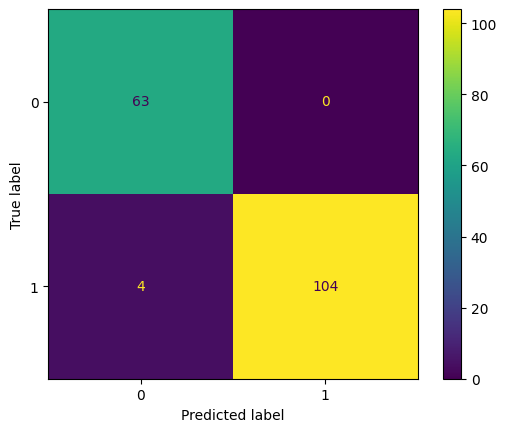

In [53]:


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

best_accuracy = 0
best_features = None

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        features = [X.columns[i], X.columns[j]]
        X_train_selected = X_train[features]
        X_test_selected = X_test[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)

        y_pred = model.predict(X_test_selected)

        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = features

X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

model = LogisticRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)


print("Best Features:", best_features)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


# QUESTION 4 (25 pts.)

(25 pts.) Construct a neural network with a single hidden layer containing two neurons
using Tensorflow. Use ReLU as activation function. Optimize the network with stochastic
gradient descent method. Choose mean squared error to calculate the loss. Fit the housing
prices dataset found on LMS using the network. Use the trained neural network model
to predict the price of a house in a city with population of 165, 000. Calculate a useful
regression metric. Plot the training and validation losses. Use a 70%-30% split for the
training and validation dataset. The architecture of the neural network and the optimizer
are fixed for this problem. Therefore, you need to choose a suitable learning rate and
number of epochs to minimize the loss. Explain the trends you found in the plots for
training and validation losses.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
RMSE: 0.57


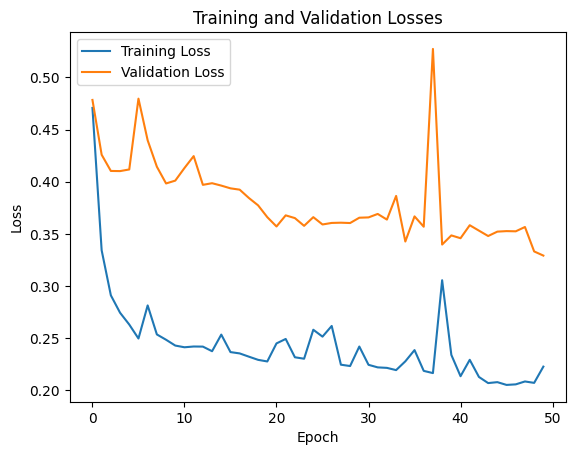

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted price for a city with population 165,000: $164678.46


In [107]:
learning_rate = 0.05
epochs = 50

data = np.loadtxt('/content/drive/MyDrive/ML/housing_prices.csv', delimiter=',', skiprows=1)
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

X_mean = np.mean(X)
X_std = np.std(X)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=83)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')
plt.show()

population = 165000
population_norm = (population - X_mean) / X_std
predicted_price_norm = model.predict(np.array([[population_norm]]))
predicted_price = (predicted_price_norm[0][0] * y_std) + y_mean

print(f"Predicted price for a city with population 165,000: ${predicted_price:.2f}")


Overall the results aren't very consistent when changing parmeters with only 2 neurons, and results seem to wildly vary. Generally, as the learning rate is increased, the loss is decreased faster and less epochs are needed. This comes at the cost of consistentcy and a larger gap between the training and validation loss. As learning rate is decreased, the training and validation loss have smaller difference, but they take longer to reach their steady state. The model with 2 neurons was found to obtain better results when a faster learning rate was used. Because the model learns faster, not as many epochs are needed, and steady state was found within 50 epochs at a rate of .05 as selected.